Import

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Data Understanding

In [100]:
dt_content = pd.read_csv("Content.csv")
dt_reactions = pd.read_csv("Reactions.csv")
dt_reactiontypes = pd.read_csv("ReactionTypes.csv")

In [101]:
dt_content

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...
...,...,...,...,...,...,...
995,995,b4cef9ef-627b-41d7-a051-5961b0204ebb,5b62e10e-3c19-4d28-a57c-e9bdc3d6758d,video,public speaking,NaN
996,996,7a79f4e4-3b7d-44dc-bdef-bc990740252c,4fe420fa-a193-4408-bd5d-62a020233609,GIF,technology,https://socialbuzz.cdn.com/content/storage/7a7...
997,997,435007a5-6261-4d8b-b0a4-55fdc189754b,35d6a1f3-e358-4d4b-8074-05f3b7f35c2a,audio,veganism,https://socialbuzz.cdn.com/content/storage/435...
998,998,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,b9bcd994-f000-4f6b-87fc-caae08acfaa1,GIF,culture,https://socialbuzz.cdn.com/content/storage/4e4...


In [102]:
dt_reactions.columns

Index(['Unnamed: 0', 'Content ID', 'User ID', 'Type', 'Datetime'], dtype='object')

In [103]:
dt_reactiontypes.columns

Index(['Unnamed: 0', 'Type', 'Sentiment', 'Score'], dtype='object')

In [104]:
# Check nos valores vazios 
dt_content.isnull().sum()

Unnamed: 0      0
Content ID      0
User ID         0
Type            0
Category        0
URL           199
dtype: int64

In [105]:
# Check nos valores vazios 
dt_reactions.isnull().sum()

Unnamed: 0       0
Content ID       0
User ID       3019
Type           980
Datetime         0
dtype: int64

In [106]:
# Check nos valores vazios 
dt_reactiontypes.isnull().sum()

Unnamed: 0    0
Type          0
Sentiment     0
Score         0
dtype: int64

Data Cleaning

In [107]:
#Chave em comum será o contentID
#O UserID será removido, pois o que nos importa são o conteudo e tem valores missing.
#O Datatime não será removido, pois podemos realizar a analise mensal.
#O Type não será removido do dt_reactions mas seus valores nulos serão removidos.

dt_content.drop(columns=['URL','Unnamed: 0','User ID'], inplace=True)
dt_reactions.drop(columns=['Unnamed: 0','User ID'], inplace=True)
dt_reactiontypes.drop(columns=['Unnamed: 0'], inplace=True)

In [108]:
#O Type não será removido do dt_reactions mas seus valores nulos serão removidos.
dt_reactions = dt_reactions.dropna(subset=['Type'])

Data Modelling

In [110]:
#Utilizando reaction dataframe como base, recomendado pela Accenture.

In [111]:
dt_reactions.head()

,Content ID,Type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58


In [112]:
dt_cont_react = pd.merge(dt_reactions, dt_content,  
                         on=['Content ID'],
                            how='outer')
dt_cont_react.head()

,Content ID,Type_x,Datetime,Type_y,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,Studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,Studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,Studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,Studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,Studying


In [113]:
dt_cont_react.isnull().sum()

Content ID     0
Type_x        38
Datetime      38
Type_y         0
Category       0
dtype: int64

In [114]:
dt_cont_react = dt_cont_react.rename(columns={'Type_y': 'Type', 'Type_x': 'Reaction'})
dt_reactiontypes = dt_reactiontypes.rename(columns={'Type': 'Reaction'})

In [115]:
dt_reactiontypes.head()

,Reaction,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


In [116]:
dt_cont_react = pd.merge(dt_cont_react, dt_reactiontypes, 
                         on=['Reaction'])
dt_cont_react.head()

,Content ID,Reaction,Datetime,Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,Studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,Studying,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,photo,Studying,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,photo,healthy eating,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,photo,healthy eating,negative,0


In [117]:
# Converter a coluna 'Datetime' para o tipo datetime
dt_cont_react['Datetime'] = pd.to_datetime(dt_cont_react['Datetime'])

# Extrair o month da coluna 'Datetime'
dt_cont_react['Month'] = dt_cont_react['Datetime'].dt.month

In [119]:
dt_cont_react.drop("Datetime", axis='columns')

,Content ID,Reaction,Type,Category,Sentiment,Score,Month
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,photo,Studying,negative,0,11
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,photo,Studying,negative,0,1
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,photo,Studying,negative,0,4
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,photo,healthy eating,negative,0,3
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,photo,healthy eating,negative,0,8
...,...,...,...,...,...,...,...
24568,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,audio,veganism,positive,72,10
24569,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,audio,veganism,positive,72,9
24570,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,GIF,culture,positive,72,10
24571,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,GIF,culture,positive,72,6


Data Analysis

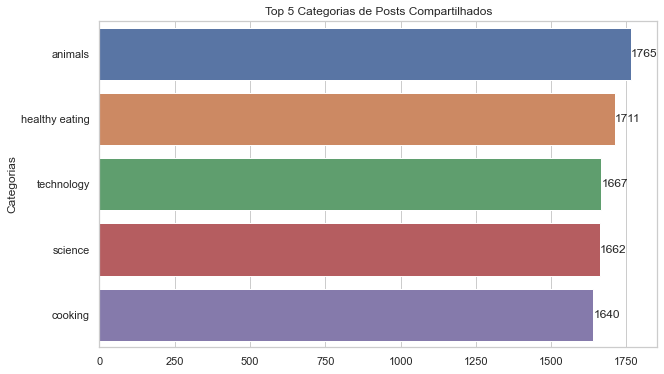

In [139]:
#Top 5 Shared Post Categories
category_counts = dt_cont_react['Category'].value_counts().head(5)
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=category_counts.values, y=category_counts.index, orient='h')
plt.ylabel('Categorias')
plt.title('Top 5 Categorias de Posts Compartilhados')

for i, v in enumerate(category_counts.values):
    bar_plot.text(v, i, str(v), ha='left', va='center')

plt.show()

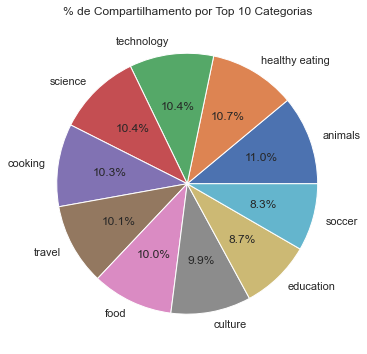

In [143]:
#% Shared by Top 10 Categories
category_counts = dt_cont_react['Category'].value_counts().head(10)

plt.figure(figsize=(10, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('% de Compartilhamento por Top 10 Categorias')

plt.show()

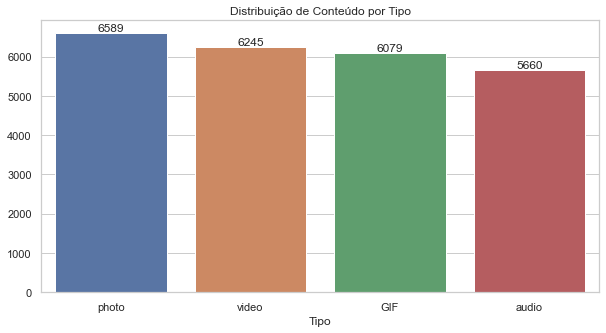

In [152]:
#Content Distribution by Type
type_counts = dt_cont_react ['Type'].value_counts()

plt.figure(figsize=(10, 5))
bar_plot = sns.barplot(x=type_counts.index, y=type_counts.values)
plt.xlabel('Tipo')
plt.title('Distribuição de Conteúdo por Tipo')

for i, v in enumerate(type_counts.values):
    bar_plot.text(i, v, str(v), ha='center', va='bottom')

plt.show()

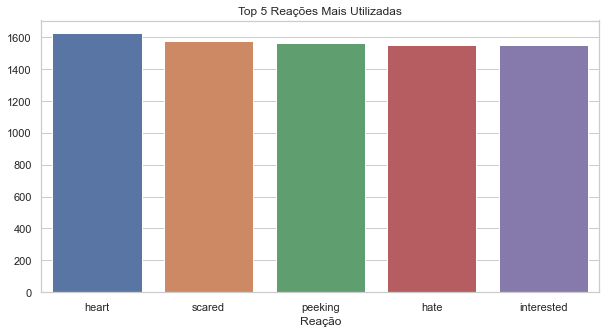

In [148]:
#Top 5 Most Used Reactions
reaction_counts = dt_cont_react['Reaction'].value_counts().head(5)

plt.figure(figsize=(10, 5))
bar_plot = sns.barplot(x=reaction_counts.index, y=reaction_counts.values)
plt.xlabel('Reação')
plt.title('Top 5 Reações Mais Utilizadas')

plt.show()

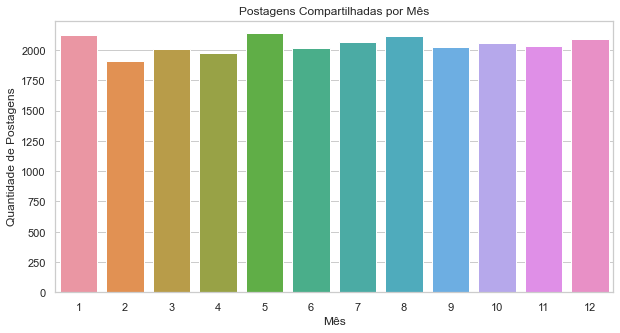

In [151]:
#Posts Shared by Month
month_count = dt_cont_react['Month'].value_counts()

plt.figure(figsize=(10, 5))
bar_plot = sns.barplot(x=month_count.index, y=month_count.values)
plt.xlabel('Mês')
plt.ylabel('Quantidade de Postagens')
plt.title('Postagens Compartilhadas por Mês')

plt.show()